In [26]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import csv
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import networkx as nx
import chart_studio.plotly as py
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from tensorflow import python as tf_python
import os
print(os.listdir("../input"))
print(os.listdir("../input/frame"))
print(os.listdir("../input/video"))

['frame', 'label_names_2018.csv', 'sample_submission.csv', 'video', 'vocabulary.csv']
['train00.tfrecord', 'train01.tfrecord']
['train00.tfrecord', 'train01.tfrecord']


In [27]:
label_names=pd.read_csv("../input/label_names_2018.csv", on_bad_lines='skip')
vocabulary=pd.read_csv("../input/vocabulary.csv", on_bad_lines='skip')
sample_submission=pd.read_csv("../input/sample_submission.csv", on_bad_lines='skip')

In [28]:
label_names.head(10)

,label_id,label_name
0,0,Game
1,1,Video game
2,2,Vehicle
3,3,Concert
4,4,Musician
5,5,Cartoon
6,6,Performance art
7,7,Car
8,8,Dance
9,9,Guitar


In [29]:
data_to_use = label_names.dropna()
data_to_use.shape

(3856, 2)

In [30]:
print('Size of labels: {}'.format(label_names.shape))

Size of labels: (3856, 2)


In [31]:
vocabulary.head(10)

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,0,788288,/m/03bt1gh,Game,https://en.wikipedia.org/wiki/Game,Games,NaN,NaN,"A game is structured form of play, usually und..."
1,1,539945,/m/01mw1,Video game,https://en.wikipedia.org/wiki/Video_game,Games,NaN,NaN,A video game is an electronic game that involv...
2,2,415890,/m/07yv9,Vehicle,https://en.wikipedia.org/wiki/Vehicle,Autos & Vehicles,NaN,NaN,A vehicle is a mobile machine that transports ...
3,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,286532,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...
5,5,236948,/m/0215n,Cartoon,https://en.wikipedia.org/wiki/Cartoon,Arts & Entertainment,NaN,NaN,A cartoon is a type of two-dimensional illustr...
6,6,203343,/m/01350r,Performance art,https://en.wikipedia.org/wiki/Performance_art,Arts & Entertainment,NaN,NaN,Performance art is a performance presented to ...
7,7,200813,/m/0k4j,Car,https://en.wikipedia.org/wiki/Car,Autos & Vehicles,NaN,NaN,"A car is a wheeled, self-powered motor vehicle..."
8,8,181579,/m/026bk,Dance,https://en.wikipedia.org/wiki/Dance,Arts & Entertainment,NaN,NaN,Dance is a performance art form consisting of ...
9,9,156226,/m/0342h,Guitar,https://en.wikipedia.org/wiki/Guitar,Arts & Entertainment,NaN,NaN,The guitar is a musical instrument classified ...


In [32]:
print('Size of vocabulary: {}'.format(vocabulary.shape))

Size of vocabulary: (3862, 9)


In [33]:
sample_submission.head(10)

,VideoId,LabelConfidencePairs
0,000c,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
1,000x,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
2,001N,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
3,001a,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
4,001l,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
5,001o,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
6,001v,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
7,0021,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
8,002G,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05
9,002O,1 0.5 2 0.3 3 0.1 4 0.05 5 0.05


In [34]:
print('Size of sample submission : {}'.format(sample_submission.shape))

Size of sample submission : (1133323, 2)


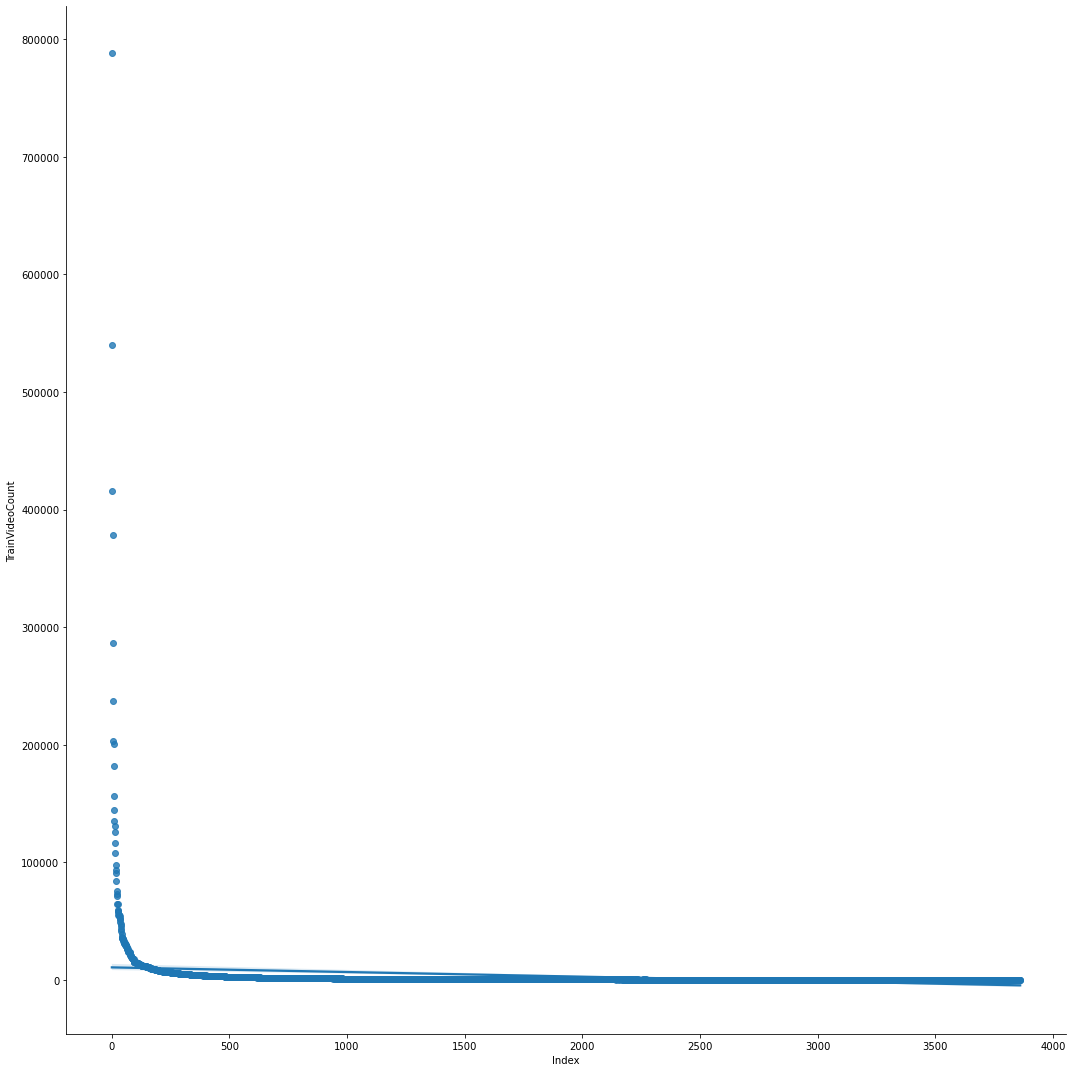

In [35]:
sns.lmplot(x='Index', y='TrainVideoCount', data=vocabulary , height=15)

In [36]:
with open('../input/vocabulary.csv', 'r',encoding="UTF-8") as f:
  vocabularylist = list(csv.reader(f))
T1=[]
for l in vocabularylist:
    if l[5] != 'NaN' and l[6] !='NaN' and l[5] != '' and l[6] !='' and l[5] !=  l[6] :
        c1 = l[5]
        c2 = l[6]
        tuple = (c1, c2)
    if l[5] != 'NaN' and l[7] !='NaN' and l[5] != '' and l[7] !='' and l[5] !=  l[7] :
        c1 = l[5]
        c2 = l[7]
        tuple = (c1, c2)
    if l[6] != 'NaN' and l[7] !='NaN' and l[6] != '' and l[7] !='' and l[7] !=  l[6] :
        c1 = l[6]
        c2 = l[7]
        tuple = (c1, c2)
    T1.append(tuple)
edges = {k: T1.count(k) for k in set(T1)}
edges

{('Beauty & Fitness', 'News'): 10,
 ('Science', 'Travel'): 8,
 ('Games', 'Shopping'): 21,
 ('Hobbies & Leisure', 'People & Society'): 36,
 ('Finance', 'Reference'): 4,
 ('News', 'Science'): 33,
 ('Arts & Entertainment', 'Games'): 228,
 ('Business & Industrial', 'Food & Drink'): 94,
 ('Hobbies & Leisure', 'Home & Garden'): 19,
 ('Home & Garden', 'Shopping'): 2,
 ('Real Estate', 'Shopping'): 1,
 ('Reference', 'Sports'): 13,
 ('Hobbies & Leisure', 'News'): 6,
 ('Food & Drink', 'Games'): 1,
 ('Sports', 'Hobbies & Leisure'): 33,
 ('Autos & Vehicles', 'Computers & Electronics'): 1,
 ('Business & Industrial', 'Computers & Electronics'): 14,
 ('Computers & Electronics', 'Science'): 18,
 ('Pets & Animals', 'Shopping'): 16,
 ('Games', 'Internet & Telecom'): 7,
 ('Books & Literature', 'Arts & Entertainment'): 4,
 ('Business & Industrial', 'Pets & Animals'): 4,
 ('Beauty & Fitness', 'Travel'): 4,
 ('Arts & Entertainment', 'Travel'): 13,
 ('Beauty & Fitness', 'People & Society'): 2,
 ('Food & Drink

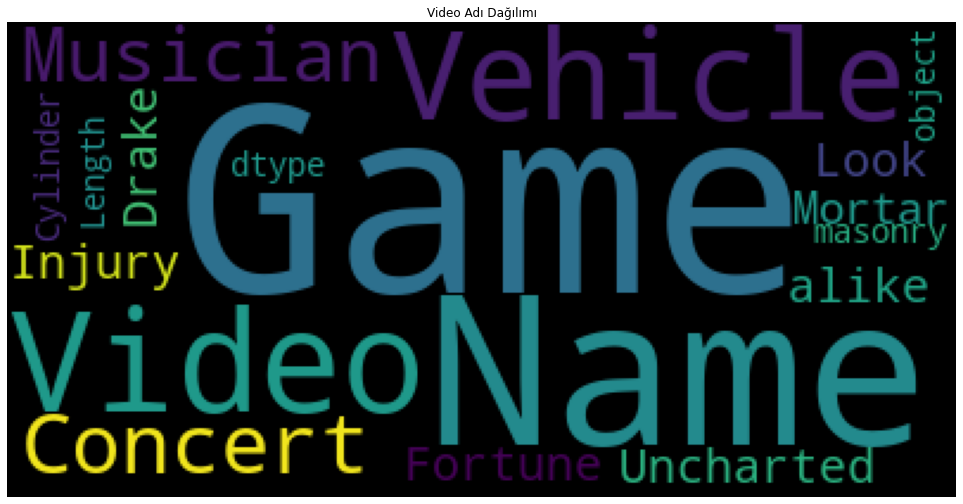

In [37]:
vocabulary.groupby('Name').corr()
plt.figure(figsize = (17,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=111, 
                          random_state=50
                         ).generate(str(vocabulary['Name']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("Video Adı Dağılımı")
plt.axis('off')
plt.show()

In [38]:
B = nx.DiGraph()
nodecolor=[]
for ed, weight in edges.items():
    if ed[0]!='Vertical2' and ed[0]!='Vertical3' and  ed[1]!='Vertical2' and ed[1]!='Vertical3':
        B.add_edge(ed[0], ed[1], weight=weight)
for k in B.nodes:
    if (k == "Beauty & Fitness"):
        nodecolor.append('blue')
    elif (k == "News"):
        nodecolor.append('Magenta')
    elif (k == "Food & Drink"):
        nodecolor.append('crimson')
    elif (k == "Health"):
        nodecolor.append('green')
    elif (k == "Science"):
        nodecolor.append('pink')
    elif (k == "Business & Industrial"):
        nodecolor.append('cyan')
    elif (k == "Home & Garden"):
        nodecolor.append('red')
    elif (k == "Travel"):
        nodecolor.append('slategrey')
    elif (k == "Arts & Entertainment"):
        nodecolor.append('red')
    elif (k == "Games"):
        nodecolor.append('grey')
    elif (k == "People & Society"):
        nodecolor.append('lightcoral')
    elif (k == "Shopping"):
        nodecolor.append('maroon')
    elif (k =="Computers & Electronics"):
        nodecolor.append('orangered')
    elif (k == "Hobbies & Leisure"):
        nodecolor.append('saddlebrown')
    elif (k == "Sports"):
        nodecolor.append('lawngreen')
    elif (k == "Real Estate"):
        nodecolor.append('deeppink')
    elif (k == "Finance"):
        nodecolor.append('springgreen')
    elif (k == "Reference"):
        nodecolor.append('red')
    elif (k == "Autos & Vehicles"):
        nodecolor.append('turquoise')
    elif (k == "Internet & Telecom"):
        nodecolor.append('lime')
    elif (k == "Law & Government"):
        nodecolor.append('blue')
    elif (k == "Jobs & Education"):
        nodecolor.append('navy')
    elif (k == "Pets & Animals"):
        nodecolor.append('lightpink')
    elif (k == "Books & Literature"):
        nodecolor.append('green')

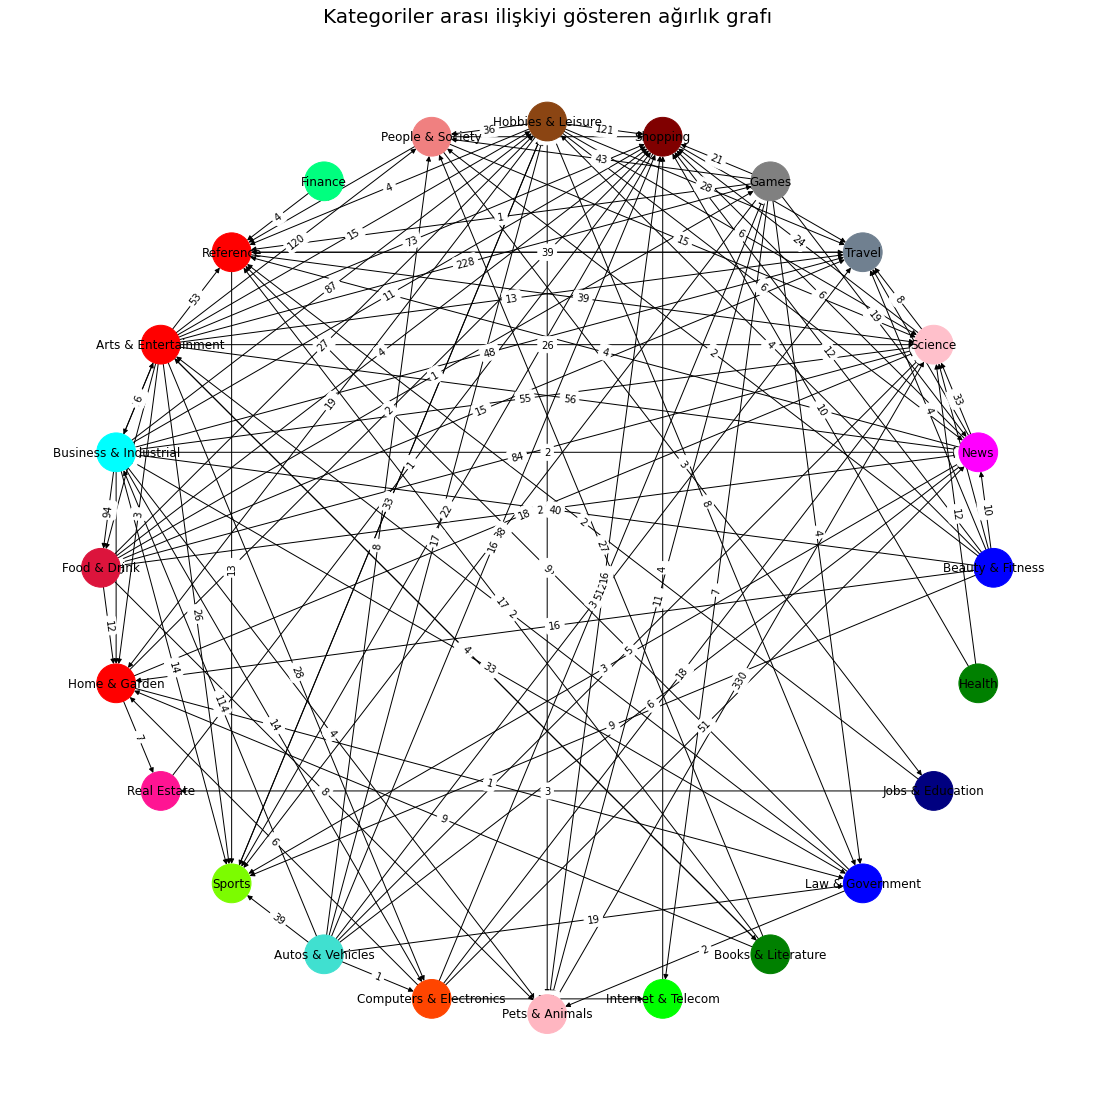

In [39]:
plt.figure(figsize = (15,15))
nx.draw(B, pos=nx.circular_layout(B), node_size=1500, with_labels=True, node_color=nodecolor)
nx.draw_networkx_edge_labels(B, pos=nx.circular_layout(B), edge_labels=nx.get_edge_attributes(B, 'weight'))
plt.title('Kategoriler arası ilişkiyi gösteren ağırlık grafı', size=20)
plt.show()

In [40]:
# keras imports
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional
from keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Reshape
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from keras.callbacks import TensorBoard
from keras.models import load_model
from keras.models import Model
import operator
import time 
import gc
import os

In [41]:
def create_train_dev_dataset(video_rgb, video_audio, frame_rgb, frame_audio, labels):
    
    shuffle_indices = np.random.permutation(np.arange(len(labels)))
    video_rgb_shuffled = video_rgb[shuffle_indices]
    video_audio_shuffled = video_audio[shuffle_indices]
    frame_rgb_shuffled = frame_rgb[shuffle_indices]
    frame_audio_shuffled = frame_audio[shuffle_indices]
    labels_shuffled = labels[shuffle_indices]

    dev_idx = max(1, int(len(labels_shuffled) * validation_split_ratio))

    del video_rgb
    del video_audio
    del frame_rgb
    del frame_audio
    gc.collect()

    train_video_rgb, val_video_rgb = video_rgb_shuffled[:-dev_idx], video_rgb_shuffled[-dev_idx:]
    train_video_audio, val_video_audio = video_audio_shuffled[:-dev_idx], video_audio_shuffled[-dev_idx:]
    
    train_frame_rgb, val_frame_rgb = frame_rgb_shuffled[:-dev_idx], frame_rgb_shuffled[-dev_idx:]
    train_frame_audio, val_frame_audio = frame_audio_shuffled[:-dev_idx], frame_audio_shuffled[-dev_idx:]
    
    train_labels, val_labels = labels_shuffled[:-dev_idx], labels_shuffled[-dev_idx:]
    
    del video_rgb_shuffled, video_audio_shuffled, frame_rgb_shuffled, frame_audio_shuffled, labels_shuffled
    gc.collect()
    
    return (train_video_rgb, train_video_audio, train_frame_rgb, train_frame_audio, train_labels, val_video_rgb, val_video_audio, 
            val_frame_rgb, val_frame_audio, val_labels)
    

In [42]:
max_frame_rgb_sequence_length = 10
frame_rgb_embedding_size = 1024

max_frame_audio_sequence_length = 10
frame_audio_embedding_size = 128

number_dense_units = 1000
number_lstm_units = 100
rate_drop_lstm = 0.2
rate_drop_dense = 0.2
activation_function='relu'
validation_split_ratio = 0.2
label_feature_size = 10

def create_model(video_rgb, video_audio, frame_rgb, frame_audio, labels):
    
    train_video_rgb, train_video_audio, train_frame_rgb, train_frame_audio, train_labels, val_video_rgb, val_video_audio, val_frame_rgb, val_frame_audio, val_labels = create_train_dev_dataset(video_rgb, video_audio, frame_rgb, frame_audio, labels) 
  
    lstm_layer_1 = Bidirectional(LSTM(number_lstm_units, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))
    lstm_layer_2 = Bidirectional(LSTM(number_lstm_units, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))

    frame_rgb_sequence_input = Input(shape=(max_frame_rgb_sequence_length, frame_rgb_embedding_size), dtype='float32')
    frame_audio_sequence_input = Input(shape=(max_frame_audio_sequence_length, frame_audio_embedding_size), dtype='float32')
    
    frame_x1 = lstm_layer_1(frame_rgb_sequence_input)
    frame_x2 = lstm_layer_2(frame_audio_sequence_input)

    video_rgb_input = Input(shape=(video_rgb.shape[1],))
    video_rgb_dense = Dense(int(number_dense_units/2), activation=activation_function)(video_rgb_input)
    
    video_audio_input = Input(shape=(video_audio.shape[1],))
    video_audio_dense = Dense(int(number_dense_units/2), activation=activation_function)(video_audio_input)
    
    # Add a 1D convolutional layer with 64 filters, a kernel size of 3, and ReLU activation
    cnn_layer_1 = Conv1D(64, 3, activation='relu')(frame_rgb_sequence_input)

    # Add a max pooling layer with a pool size of 2
    cnn_layer_1 = MaxPooling1D(2)(cnn_layer_1)

    # Add a 1D convolutional layer with 128 filters, a kernel size of 3, and ReLU activation
    cnn_layer_2 = Conv1D(128, 3, activation='relu')(cnn_layer_1)

    # Add a max pooling layer with a pool size of 2
    cnn_layer_2 = MaxPooling1D(2)(cnn_layer_2)

    # Flatten the output of the CNN layers
    cnn_output = Flatten()(cnn_layer_2)

    # Merge the CNN output with the output of the LSTM layers
    merged_frame = concatenate([cnn_output, frame_x1, frame_x2])
    merged_frame = BatchNormalization()(merged_frame)
    merged_frame = Dropout(rate_drop_dense)(merged_frame)
    merged_frame_dense = Dense(int(number_dense_units/2), activation=activation_function)(merged_frame)
    
    merged_video = concatenate([video_rgb_dense, video_audio_dense])
    merged_video = BatchNormalization()(merged_video)
    merged_video = Dropout(rate_drop_dense)(merged_video)
    merged_video_dense = Dense(int(number_dense_units/2), activation=activation_function)(merged_video)
    
    merged = concatenate([merged_frame_dense, merged_video_dense])
    merged = BatchNormalization()(merged)
    merged = Dropout(rate_drop_dense)(merged)
     
    merged = Dense(number_dense_units, activation=activation_function)(merged)
    merged = BatchNormalization()(merged)
    merged = Dropout(rate_drop_dense)(merged)
    
    # Pass the merged output through a dense layer and output the final prediction
    preds = Dense(label_feature_size, activation='sigmoid')(merged)

    # Create a model with all of the layers defined above
    model = Model(inputs=[frame_rgb_sequence_input, frame_audio_sequence_input, video_rgb_input, video_audio_input], outputs=preds)

    # Print a summary of the model
    print(model.summary())
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])
    early_stopping = EarlyStopping(monitor='val_loss', min_delta= 0.0001, patience=4)
    
    STAMP = 'lstm_%d_%d_%.2f_%.2f' % (number_lstm_units, number_dense_units, rate_drop_lstm, rate_drop_dense)

    checkpoint_dir = 'checkpoints/' + str(int(time.time())) + '/'

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    bst_model_path = checkpoint_dir + STAMP + '.h5'
    model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=False)
    tensorboard = TensorBoard(log_dir=checkpoint_dir + "logs/{}".format(time.time()))
    
    model.fit([train_frame_rgb, train_frame_audio, train_video_rgb, train_video_audio], train_labels,
              validation_data=([val_frame_rgb, val_frame_audio, val_video_rgb, val_video_audio], val_labels),
              epochs=20, batch_size=32, shuffle=True, callbacks=[early_stopping, model_checkpoint, tensorboard])    
    return model
  

In [43]:
import numpy as np
import random

sample_length = 1000

video_rgb = np.random.rand(sample_length, 1024)
video_audio = np.random.rand(sample_length, 128)

frame_rgb = np.random.rand(sample_length, 10, 1024)
frame_audio = np.random.rand(sample_length, 10, 128)

labels = np.zeros([sample_length,10])
for i in range(len(labels)):
    j = random.randint(0,9)
    labels[i][j] = 1 

In [44]:
model = create_model(video_rgb, video_audio, frame_rgb, frame_audio, labels)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 10, 1024)]   0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 8, 64)        196672      ['input_9[0][0]']                
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 4, 64)       0           ['conv1d_4[0][0]']               
                                                                                                  
 conv1d_5 (Conv1D)              (None, 2, 128)       24704       ['max_pooling1d_4[0][0]']        
                                                                                            

25/25 [==============================] - 3s 129ms/step - loss: 0.0450 - acc: 0.9987 - val_loss: 0.4010 - val_acc: 0.0900


In [45]:
import numpy as np
import operator

# Generate random test data
test_video_rgb = np.random.rand(1, 1024)
test_video_audio = np.random.rand(1, 128)

test_frame_rgb = np.random.rand(1, 10, 1024)
test_frame_audio = np.random.rand(1, 10, 128)

# Use the model to predict labels for the test data
predictions = model.predict([test_frame_rgb, test_frame_audio, test_video_rgb, test_video_audio], verbose=1)
predictions = predictions.ravel()

# Find the label with the highest probability
index, value = max(enumerate(predictions), key=operator.itemgetter(1))

# Print the predicted label and probability
print(f"Predicted as: Label: {index} with probability: {value}")

1/1 [==============================] - 1s 983ms/step
Predicted as: Label: 5 with probability: 0.22824625670909882
